In [ ]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
from shared import generate


# *Blunt Expression*, *Workplace*

### **Identify and Explain Issue**


In [ ]:
def identify_explain_blunt(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. Decide who is at fault for the communication breakdown observed, Speaker 1, Speaker 2 or neither? Explain your decision. Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. One of the two speakers is autistic. You must output a dictionary exactly as follows with no extra tags or text: { "fault":"Speaker #", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('blunt_generated_data/blunt.json') as f:
    blunt_statements_generated = json.load(f)
    
blunt_statements_generated[0:2]


[{'Speaker 1': 'I believe we should implement a four-day work week for improved productivity.',
  'Speaker 2': 'That sounds unnecessary.'},
 {'Speaker 1': "I've drafted a proposal for the quarterly budget review.",
  'Speaker 2': "I don't see its relevance."}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated[i].items()])
    response = identify_explain_blunt(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [ ]:
with open('blunt_analysis_data/identify_explain_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('blunt_analysis_data/identify_explain_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'fault': 'Speaker 2',
  'explanation': "Speaker 1 presents an idea for discussion by suggesting a four-day work week to improve productivity. Speaker 2's response, 'That sounds unnecessary,' dismisses the idea without providing any rationale or engaging in a constructive dialogue. This abrupt dismissal can hinder open communication and does not recognize the potential value in exploring different perspectives. A neurodiversity-informed approach advocates for understanding and valuing diverse viewpoints and communication styles, hence Speaker 2 is at fault for the communication breakdown by not fostering an inclusive and respectful exchange of ideas."},
 {'fault': 'Speaker 2',
  'explanation': "Speaker 2's response dismisses Speaker 1's effort without seeking to understand or clarify the proposal's details. A more constructive approach would have been to ask questions to gain more context before passing judgment. Recognizing diverse communication styles, it's important to foster an en

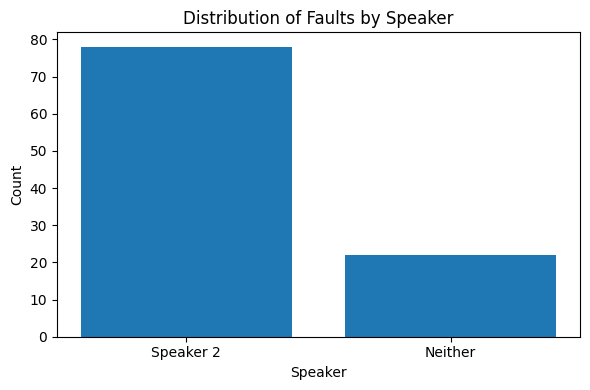

In [ ]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [ ]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nThe dialogue above contains an exchange between speaker 1 and speaker 2. As a communication expert, what feedback would you provide to the speaker(s)? Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('blunt_generated_data/blunt.json') as f:
    blunt_statements_generated = json.load(f)
    
blunt_statements_generated[0:2]


[{'Speaker 1': 'I believe we should implement a four-day work week for improved productivity.',
  'Speaker 2': 'That sounds unnecessary.'},
 {'Speaker 1': "I've drafted a proposal for the quarterly budget review.",
  'Speaker 2': "I don't see its relevance."}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))


In [ ]:
with open('blunt_analysis_data/provide_feedback_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('blunt_analysis_data/provide_feedback_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': "Speaker 1 presented an idea with a potential for improving productivity. It would be beneficial if Speaker 2 acknowledged this perspective before expressing their disagreement. For example, Speaker 2 could say, 'I understand that a four-day work week might improve productivity for some, but I have concerns about its necessity.' This approach values Speaker 1's input and opens a pathway for a constructive discussion considering diverse viewpoints and cognitive styles."},
 {'feedback': 'For Speaker 1: Clearly explain the purpose and importance of the proposal to provide context. For Speaker 2: Consider asking clarifying questions to understand the intent before dismissing its relevance. This approach fosters a more inclusive and understanding communication environment.'},
 {'feedback': 'Speaker 1 could provide more context or specifics about why the update is needed to help Speaker 2 understand the rationale. Speaker 2 should seek clarification if something seems complicat

### **Identify Autistic Speaker**


In [ ]:
def identify_autistic_speaker(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '''\n\nBased on the dialogue above, can you identify which speaker's communication traits are commonly associated with autism spectrum: Speaker 1, Speaker 2 or neither? Explain your decision. Take a neurodiversity-informed stance, recognizing and valuing differences in cognition and communication styles. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "autistic":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}''',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('blunt_generated_data/blunt.json') as f:
    blunt_statements_generated = json.load(f)
    


In [ ]:
blunt_statements_generated[0:2]

[{'Speaker 1': 'I believe we should implement a four-day work week for improved productivity.',
  'Speaker 2': 'That sounds unnecessary.'},
 {'Speaker 1': "I've drafted a proposal for the quarterly budget review.",
  'Speaker 2': "I don't see its relevance."}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in blunt_statements_generated[i].items()])
    response = identify_autistic_speaker(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(1)))


In [ ]:
with open('blunt_analysis_data/autistic_speaker_ctx_all.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('blunt_analysis_data/autistic_speaker_ctx_all.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'autistic': 'neither',
  'explanation': "The brief dialogue provided does not contain enough information to identify communication traits specifically associated with autism spectrum. Both speakers express their opinions on the topic without showing characteristic communication patterns such as difficulties with social interaction, repetitive behaviors, or narrow interests that are often associated with autism. It is important to recognize and value the wide range of communication styles individuals use, and this brief exchange does not offer sufficient detail to attribute either speaker's communication to autism spectrum traits."}]

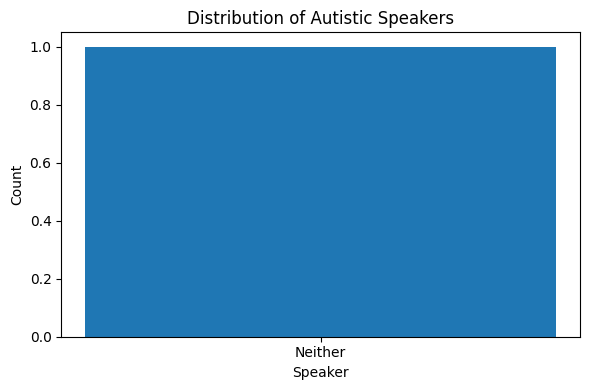

In [ ]:
normalized_faults = []
for r in results_loaded:
    fault = r['autistic'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Autistic Speakers")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
